<a href="https://colab.research.google.com/github/Imama-Kainat/BirthDayGift/blob/main/Rebar2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.8.0

# Clone the TensorFlow models repository
!git clone --depth 1 https://github.com/tensorflow/models


Cloning into 'models'...
remote: Enumerating objects: 4298, done.
remote: Counting objects: 100% (4298/4298), done.
remote: Compressing objects: 100% (3280/3280), done.
remote: Total 4298 (delta 1208), reused 2175 (delta 946), pack-reused 0 (from 0)
Receiving objects: 100% (4298/4298), 52.93 MiB | 28.87 MiB/s, done.
Resolving deltas: 100% (1208/1208), done.


In [ ]:
%cd models/research/
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .


/content/models/research/models/research
Processing /content/models/research/models/research
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
# Modify setup.py file to install the tf-models-official repository targeted at TF v2.8.0
import re
with open('/content/models/research/object_detection/packages/tf2/setup.py') as f:
    s = f.read()

with open('/content/models/research/setup.py', 'w') as f:
    # Set fine_tune_checkpoint path
    s = re.sub('tf-models-official>=2.5.1',
               'tf-models-official==2.8.0', s)
    f.write(s)

In [ ]:
# Install the Object Detection API (NOTE: This block takes about 10 minutes to finish executing)

# Need to do a temporary fix with PyYAML because Colab isn't able to install PyYAML v5.4.1
!pip install pyyaml==5.3
!pip install /content/models/research/

# Need to downgrade to TF v2.8.0 due to Colab compatibility bug with TF v2.10 (as of 10/03/22)
!pip install tensorflow==2.8.0

# Install CUDA version 11.0 (to maintain compatibility with TF v2.8.0)
!pip install tensorflow_io==0.23.1
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
!mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
!wget http://developer.download.nvidia.com/compute/cuda/11.0.2/local_installers/cuda-repo-ubuntu1804-11-0-local_11.0.2-450.51.05-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1804-11-0-local_11.0.2-450.51.05-1_amd64.deb
!apt-key add /var/cuda-repo-ubuntu1804-11-0-local/7fa2af80.pub
!apt-get update && sudo apt-get install cuda-toolkit-11-0
!export LD_LIBRARY_PATH=/usr/local/cuda-11.0/lib64:$LD_LIBRARY_PATH

Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Created wheel for object_detection: filename=object_detection-0.1-py3-none-any.whl size=1697356 sha256=6857d0d5b733cd0b59928c46dcb6dd97eabea0429198027bb78cac8e0446e619
  Stored in directory: /tmp/pip-ephem-wheel-cache-exl0by5b/wheels/53/dd/70/2de274d6c443c69d367bd6a5606f95e5a6df61aacf1435ec0d
Successfully built object_detection
  Attempting uninstall: object_detection
    Found existing installation: object_detection 0.1
    Uninstalling object_detection-0.1:
      Successfully uninstalled object_detection-0.1
--2024-08-31 06:27:45--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [application/octet-stream]

In [ ]:
# Run Model Bulider Test file, just to verify everything's working properly
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py


2024-08-31 06:29:05.280934: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-08-31 06:29:05.280987: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
Running tests under Python 3.10.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0831 06:29:05.795859 135015825887232 model_builder.py:1112] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.82s
I0831 06:29:06.107842 135015825887232 test_util.py:2373] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.82s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_mod

In [ ]:
!pip install roboflow
!pip install tensorflow==2.8.0


In [ ]:
from roboflow import Roboflow
import os

# Initialize Roboflow API with your API key
rf = Roboflow(api_key="ophuLYpKK9uwOxmabhg5")
project = rf.workspace("rebars-counter").project("rebarcounterfinal")
version = project.version(1)
dataset = version.download("voc")

# The dataset will be downloaded and unzipped automatically
dataset_dir = dataset.location
print(f"Dataset downloaded to {dataset_dir}")


loading Roboflow workspace...
loading Roboflow project...
Dataset downloaded to /content/models/research/RebarCounterFinal-1


In [ ]:
import os
import shutil
import random

# Create directories for train, validation, and test
os.makedirs(f"{dataset_dir}/train/images", exist_ok=True)
os.makedirs(f"{dataset_dir}/train/annotations", exist_ok=True)
os.makedirs(f"{dataset_dir}/validation/images", exist_ok=True)
os.makedirs(f"{dataset_dir}/validation/annotations", exist_ok=True)
os.makedirs(f"{dataset_dir}/test/images", exist_ok=True)
os.makedirs(f"{dataset_dir}/test/annotations", exist_ok=True)

# Get all image files
image_files = [f for f in os.listdir(f"{dataset_dir}/train") if f.endswith(('.jpg', '.jpeg', '.png'))]

# Shuffle the dataset
random.shuffle(image_files)

# Define split sizes
train_split = 0.8
val_split = 0.1

train_count = int(len(image_files) * train_split)
val_count = int(len(image_files) * val_split)

# Split the data
train_files = image_files[:train_count]
val_files = image_files[train_count:train_count+val_count]
test_files = image_files[train_count+val_count:]

# Function to move files to their respective directories
def move_files(file_list, source_dir, dest_image_dir, dest_ann_dir):
    for file_name in file_list:
        base_name = os.path.splitext(file_name)[0]
        shutil.move(os.path.join(source_dir, f"{base_name}.jpg"), dest_image_dir)
        shutil.move(os.path.join(source_dir, f"{base_name}.xml"), dest_ann_dir)

# Move the files
move_files(train_files, f"{dataset_dir}/train", f"{dataset_dir}/train/images", f"{dataset_dir}/train/annotations")
move_files(val_files, f"{dataset_dir}/train", f"{dataset_dir}/validation/images", f"{dataset_dir}/validation/annotations")
move_files(test_files, f"{dataset_dir}/train", f"{dataset_dir}/test/images", f"{dataset_dir}/test/annotations")

print("Dataset split into train, validation, and test sets.")


Dataset split into train, validation, and test sets.


In [ ]:
# Example of creating a label map
labels = ['label1', 'label2']  # replace with your actual labels

with open(os.path.join(dataset_dir, "label_map.pbtxt"), "w") as f:
    for i, label in enumerate(labels):
        f.write("item {\n")
        f.write(f"  id: {i+1}\n")
        f.write(f"  name: '{label}'\n")
        f.write("}\n")

print("Label map created.")


Label map created.


In [ ]:
!wget https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/create_csv.py
!wget https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/create_tfrecord.py


--2024-08-31 06:45:40--  https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/create_csv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1348 (1.3K) [text/plain]
Saving to: ‘create_csv.py’

create_csv.py       100%[===================>]   1.32K  --.-KB/s    in 0s      

2024-08-31 06:45:40 (52.7 MB/s) - ‘create_csv.py’ saved [1348/1348]

--2024-08-31 06:45:40--  https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/create_tfrecord.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githu

In [ ]:
# Generate CSV files from the dataset
!python3 create_csv.py --input_dir={dataset_dir}/train --output_csv=train_labels.csv
!python3 create_csv.py --input_dir={dataset_dir}/validation --output_csv=validation_labels.csv

# Convert CSV files to TFRecord files
!python3 create_tfrecord.py --csv_input=train_labels.csv --image_dir={dataset_dir}/train/images --output_path=train.tfrecord --labelmap={dataset_dir}/label_map.pbtxt
!python3 create_tfrecord.py --csv_input=validation_labels.csv --image_dir={dataset_dir}/validation/images --output_path=val.tfrecord --labelmap={dataset_dir}/label_map.pbtxt


Traceback (most recent call last):
  File "/content/models/research/create_csv.py", line 36, in <module>
    main()
  File "/content/models/research/create_csv.py", line 33, in main
    xml_df.to_csv(('images/' + folder + '_labels.csv'), index=None)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 3902, in to_csv
    return DataFrameRenderer(formatter).to_csv(
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py", line 1152, in to_csv
    csv_formatter.save()
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/formats/csvs.py", line 247, in save
    with get_handle(
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/common.py", line 739, in get_handle
    check_parent_directory(str(handle))
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/common.py", line 604, in check_parent_directory
    raise OSError(rf"Cannot save file into a non-existent directory: '{parent}'")
OSError: Cannot save file into a non-existent d

In [ ]:
# Create a directory for your model
!mkdir -p /content/models/mymodel/

# Download the pretrained model weights
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
!tar -xvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz -C /content/models/mymodel/

# Download the training configuration file for the model
!wget https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config -O /content/models/mymodel/pipeline_file.config


--2024-08-31 06:46:07--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.204.207, 172.217.203.207, 74.125.134.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.204.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M   118MB/s    in 0.2s    

2024-08-31 06:46:07 (118 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x

In [ ]:
import re

pipeline_fname = '/content/models/mymodel/pipeline_file.config'
fine_tune_checkpoint = '/content/models/mymodel/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0'
train_record_fname = '/content/train.tfrecord'
val_record_fname = '/content/val.tfrecord'
label_map_pbtxt_fname = os.path.join(dataset_dir, "label_map.pbtxt")

with open(pipeline_fname) as f:
    s = f.read()

with open(pipeline_fname, 'w') as f:
    # Set fine_tune_checkpoint path
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)

    # Set tfrecord files for train and validation datasets
    s = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")',
               'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")',
               'input_path: "{}"'.format(val_record_fname), s)

    # Set label_map_path
    s = re.sub('label_map_path: ".*?"',
               'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set batch size
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(16), s)

    # Set number of training steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(20000), s)

    # Set number of classes
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(len(labels)), s)

    f.write(s)


In [ ]:
!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_fname} \
    --model_dir='/content/training/' \
    --alsologtostderr \
    --num_train_steps=20000 \
    --sample_1_of_n_eval_examples=1


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're us

In [ ]:
# Create directory to save the exported model
!mkdir /content/custom_model_lite
output_directory = '/content/custom_model_lite'

# Path to the last checkpoint
last_model_path = '/content/training'

# Export the TFLite graph
!python /content/models/research/object_detection/export_tflite_graph_tf2.py \
    --trained_checkpoint_dir={last_model_path} \
    --output_directory={output_directory} \
    --pipeline_config_path={pipeline_fname}


2024-08-31 08:12:04.350414: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-08-31 08:12:04.350537: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
Traceback (most recent call last):
  File "/content/models/research/object_detection/export_tflite_graph_tf2.py", line 160, in <module>
    app.run(main)
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 308, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 254, in _run_main
    sys.exit(main(argv))
  File "/content/models/research/object_detection/export_tflite_graph_tf2.py", line 153, in main
    export_tflite_graph_lib_tf2.export_tflite_model(
  File "/usr/local/lib/python3.10/dist-packages/object_detection/export_

In [ ]:
!find /content/ -name "saved_model.pb"


/content/models/mymodel/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb


In [ ]:
import tensorflow as tf

# Set the correct path to your saved_model directory
saved_model_dir = '/content/models/mymodel/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model'

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

# Save the converted model to a file
output_path = '/content/custom_model_lite/detect.tflite'
with open(output_path, 'wb') as f:
    f.write(tflite_model)

print(f'TFLite model saved at {output_path}')


TFLite model saved at /content/custom_model_lite/detect.tflite


In [45]:
import tensorflow as tf
import numpy as np
import cv2

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='/content/custom_model_lite/detect.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load an example image (use your image path here)
image_path = '/content/rebar_935_14MM_jpg.rf.d4cc1bec5c21fe0e90c7c92cb8d85a16.jpg'
img = cv2.imread(image_path)

# Preprocess the image
input_shape = input_details[0]['shape']
input_data = cv2.resize(img, (input_shape[2], input_shape[1]))
# Change the data type to UINT8
input_data = (input_data / 255.0).astype(np.uint8)
input_data = np.expand_dims(input_data, axis=0)

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run inference
interpreter.invoke()

# Get the output results
boxes = interpreter.get_tensor(output_details[0]['index'])
classes = interpreter.get_tensor(output_details[1]['index'])
scores = interpreter.get_tensor(output_details[2]['index'])

# Post-process the results (e.g., display bounding boxes and labels)
# for i in range(len(scores[0])):
#     if scores[0][i] > 0.5:  # Set a confidence threshold
#         print(f"Detected object: {classes[0][i]} with confidence {scores[0][i]}")

# ... (rest of your code)

# Get the number of detections
num_detections = interpreter.get_tensor(output_details[3]['index'])  # Keep as array

# Print the number of detections array
print("Num detections array:", num_detections)

if scores[0] > 0.5:  # Set a confidence threshold
    print(f"Detected object with confidence {scores[0]}")

Num detections array: [[[0.00363439 0.00274646 0.00200337 ... 0.00122428 0.00152445 0.002345  ]
  [0.0023081  0.00213587 0.00136393 ... 0.00127047 0.00107002 0.00158462]
  [0.00251749 0.00518474 0.00181955 ... 0.00178647 0.00152805 0.00393784]
  ...
  [0.00460613 0.01047    0.00412577 ... 0.00400919 0.00337538 0.00322604]
  [0.00381741 0.00604227 0.00327614 ... 0.00294799 0.00350848 0.00269067]
  [0.00394797 0.00775033 0.00457284 ... 0.00383556 0.00349343 0.00317761]]]
Detected object with confidence 100.0


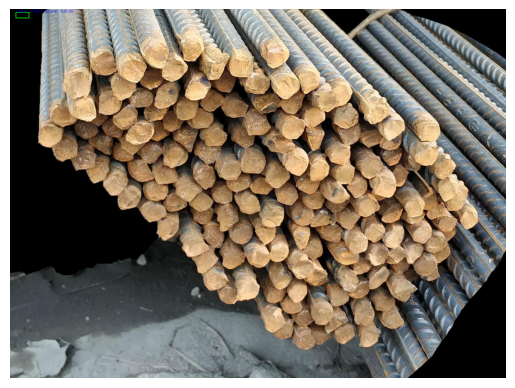

In [51]:
import matplotlib.pyplot as plt

def draw_boxes(img, boxes, classes, scores, threshold=0.5):
    # Check if there are any detections with confidence above the threshold
    if scores > threshold:
        ymin, xmin, ymax, xmax = boxes[0][0]  # Access the first (and only) detection
        start_point = (int(xmin * img.shape[1]), int(ymin * img.shape[0]))
        end_point = (int(xmax * img.shape[1]), int(ymax * img.shape[0]))
        img = cv2.rectangle(img, start_point, end_point, (0, 255, 0), 2)
        label = f"Class: {int(classes[0][0])}, Score: {scores[0]:.2f}"  # Use scores[0] directly
        cv2.putText(img, label, start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
    return img

# Draw the bounding boxes on the image
annotated_img = draw_boxes(img.copy(), boxes, classes, scores)

# Display the image with detections
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [52]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Save the quantized model
quantized_output_path = '/content/custom_model_lite/detect_quant.tflite'
with open(quantized_output_path, 'wb') as f:
    f.write(tflite_quantized_model)

print(f'Quantized TFLite model saved at {quantized_output_path}')


Quantized TFLite model saved at /content/custom_model_lite/detect_quant.tflite
